<a href="https://colab.research.google.com/github/Zahab163/Star_Wars_Project/blob/main/Star_Wars_DQ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
#import libraries used in the process
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [46]:
#import csv file on which we will work on
star_wars = pd.read_csv("/content/star_wars.csv")
#Display Headers
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [47]:
#Information about the file in detail
star_wars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186 entries, 0 to 1185
Data columns (total 38 columns):
 #   Column                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                         --------------  -----  
 0   RespondentID                                                                                                                                   1186 non-null   int64  
 1   Have you seen any of the 6 films in the Star Wars franchise?                                                                                   1186 non-null   object 
 2   Do you consider yourself to be a fan of the Star Wars film franchise?                                                                          836 non-null    object 
 3   Which of the following Star 

Please upload the `star_wars.csv` file. You can do this by clicking the folder icon on the left sidebar, then the upload icon, and selecting the file from your computer. Once uploaded, you can run the code cell again.

In [48]:
#To know about a specific Question in the file
star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"].value_counts(dropna=False)

,count
Do you consider yourself to be a fan of the Star Wars film franchise?,
Yes,552
NaN,350
No,284


In [49]:
#changing  yes , no to bolean True , False

yes_no = {"Yes": True, "No": False, True: True, False: False} # True and False keys ensure correct values aren't overwritten if cell is run more than once

#colums in which we want changes
for col in [
    "Have you seen any of the 6 films in the Star Wars franchise?",
    "Do you consider yourself to be a fan of the Star Wars film franchise?",
    "Are you familiar with the Expanded Universe?",
    "Do you consider yourself to be a fan of the Star Trek franchise?"

    ]:
    star_wars[col] = star_wars[col].map(yes_no, na_action='ignore')

star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"].value_counts(dropna=False)

,count
Do you consider yourself to be a fan of the Star Wars film franchise?,
True,552
NaN,350
False,284


In [50]:
#mapping
movie_mapping = {
    "Star Wars: Episode I  The Phantom Menace": True,
    np.nan: False,
    "Star Wars: Episode II  Attack of the Clones": True,
    "Star Wars: Episode III  Revenge of the Sith": True,
    "Star Wars: Episode IV  A New Hope": True,
    "Star Wars: Episode V The Empire Strikes Back": True,
    "Star Wars: Episode VI Return of the Jedi": True,
    True: True,
    False: False
}

for col in star_wars.columns[3:9]:
    star_wars[col] = star_wars[col].map(movie_mapping)

star_wars.iloc[:,3:9].head()

,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,True,True,True,True,True,True
1,False,False,False,False,False,False
2,True,True,True,False,False,False
3,True,True,True,True,True,True
4,True,True,True,True,True,True


In [51]:
#renamed unnamed columns
star_wars = star_wars.rename(columns={
        "Which of the following Star Wars films have you seen? Please select all that apply.": "seen_1",
        "Unnamed: 4": "seen_2",
        "Unnamed: 5": "seen_3",
        "Unnamed: 6": "seen_4",
        "Unnamed: 7": "seen_5",
        "Unnamed: 8": "seen_6"
        })

star_wars.iloc[:,3:9].head()


,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6
0,True,True,True,True,True,True
1,False,False,False,False,False,False
2,True,True,True,False,False,False
3,True,True,True,True,True,True
4,True,True,True,True,True,True


In [52]:
#rename unnamed columns
star_wars = star_wars.rename(columns={
        "Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.": "ranking_ep1",
        "Unnamed: 10": "ranking_ep2",
        "Unnamed: 11": "ranking_ep3",
        "Unnamed: 12": "ranking_ep4",
        "Unnamed: 13": "ranking_ep5",
        "Unnamed: 14": "ranking_ep6"
        })

star_wars.iloc[:,9:15].head()


,ranking_ep1,ranking_ep2,ranking_ep3,ranking_ep4,ranking_ep5,ranking_ep6
0,3.0,2.0,1.0,4.0,5.0,6.0
1,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,2.0,3.0,4.0,5.0,6.0
3,5.0,6.0,1.0,2.0,4.0,3.0
4,5.0,4.0,6.0,2.0,1.0,3.0


In [53]:
#checking the dtype
star_wars.dtypes


,0
RespondentID,int64
Have you seen any of the 6 films in the Star Wars franchise?,bool
Do you consider yourself to be a fan of the Star Wars film franchise?,object
seen_1,bool
seen_2,bool
seen_3,bool
seen_4,bool
seen_5,bool
seen_6,bool
ranking_ep1,float64


In [54]:
# Renaming the rest of the columns for completeness's sake...
star_wars = star_wars.rename(columns={
    'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.': 'Han Solo',
    'Unnamed: 16': 'Luke Skywalker',
    'Unnamed: 17': 'Princess Leia Organa',
    'Unnamed: 18': 'Anakin Skywalker',
    'Unnamed: 19': 'Obi Wan Kenobi',
    'Unnamed: 20': 'Emperor Palpatine',
    'Unnamed: 21': 'Darth Vader',
    'Unnamed: 22': 'Lando Calrissian',
    'Unnamed: 23': 'Boba Fett',
    'Unnamed: 24': 'C-3P0',
    'Unnamed: 25': 'R2 D2',
    'Unnamed: 26': 'Jar Jar Binks',
    'Unnamed: 27': 'Padme Amidala',
    'Unnamed: 28': 'Yoda'
})

star_wars.iloc[:,15:29].head()

,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda
0,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A)
3,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably
4,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very unfavorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably


In [55]:
#checking the mean ranking
mean_ranking = star_wars[star_wars.columns[9:15]].mean().sort_values()
mean_ranking


,0
ranking_ep5,2.513158
ranking_ep6,3.047847
ranking_ep4,3.272727
ranking_ep1,3.732934
ranking_ep2,4.087321
ranking_ep3,4.341317


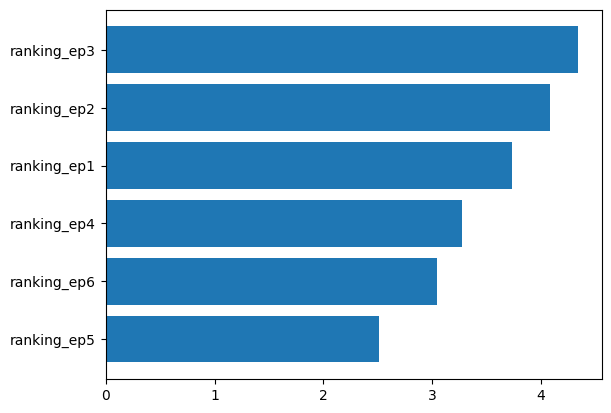

In [56]:
#showing ranking in chart
plt.barh(mean_ranking.index ,mean_ranking)
plt.show()

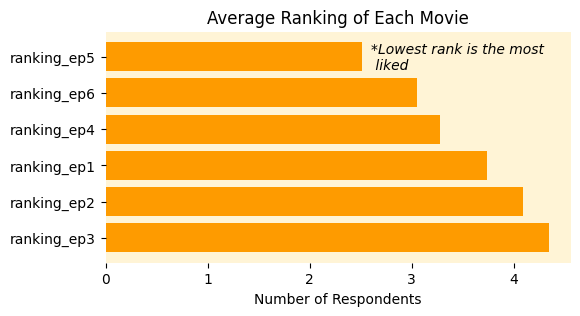

In [57]:
#creates a figure and a set of axes for the plot, specifying the size of the figure.
fig,ax = plt.subplots(figsize=(6,3))
#creates the horizontal bar chart using the index and values
ax.barh(mean_ranking.index, mean_ranking, color='#fe9b00')
#background Color
ax.set_facecolor('#fff4d6')
#Add title
ax.set_title('Average Ranking of Each Movie')
#Remove Borders
for spine in ['top', 'right', 'bottom', 'left']:
    ax.spines[spine].set_visible(False)
ax.invert_yaxis()
#Add text
ax.text(2.6,0.35,'*Lowest rank is the most\n liked', fontstyle='italic')
#Named the X Axis
ax.set_xlabel('Number of Respondents')
#To display Perfectly
plt.show()


In [58]:
total_seen = star_wars[star_wars.columns[3:9]].sum()
total_seen

,0
seen_1,673
seen_2,571
seen_3,550
seen_4,607
seen_5,758
seen_6,738


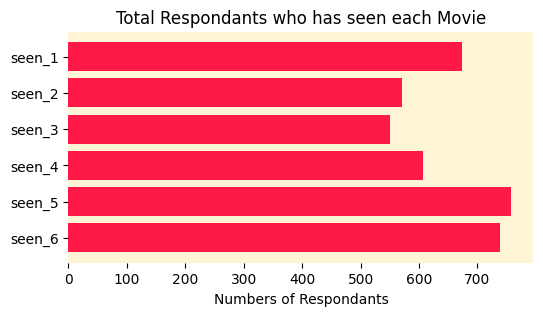

In [59]:
#creates a figure and a set of axes for the plot, specifying the size of the figure.
fig,ax = plt.subplots(figsize=(6,3))
#creates the horizontal bar chart using the index and values
ax.barh(total_seen.index, total_seen, color='#ff1947')
#setting background color
ax.set_facecolor('#fff4d6')
#Giving the Title to the Chart
ax.set_title('Total Respondants who has seen each Movie')
#Labeling the x-axis
ax.set_xlabel('Numbers of Respondants')
#for removing the dark visible borders
for spine in ['top', 'right', 'bottom', 'left']:
    ax.spines[spine].set_visible(False)
#reverse the Chart
ax.invert_yaxis()
#display Perfectly
plt.show()

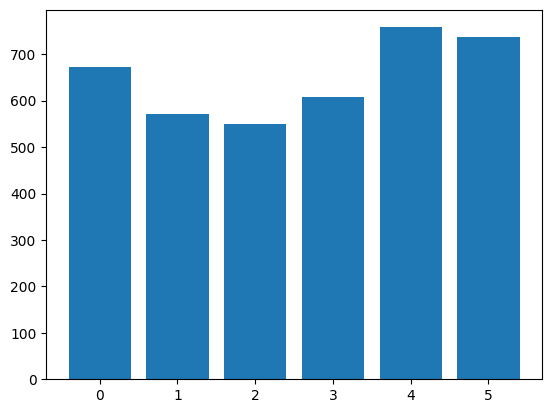

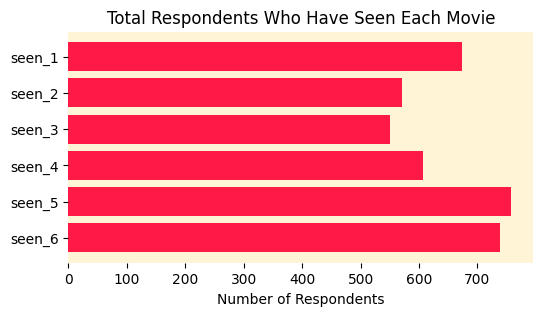

In [60]:
# Version 1: simple and quick
plt.bar(range(6), star_wars[star_wars.columns[3:9]].sum())

# Version 2: optimized for stakeholders
fig,ax = plt.subplots(figsize=(6,3))
rankings = ax.barh(total_seen.index, total_seen, color='#ff1947')
ax.set_facecolor('#fff4d6')
ax.set_title('Total Respondents Who Have Seen Each Movie')
ax.set_xlabel("Number of Respondents")
for spine in ['top', 'right', 'bottom', 'left']:
    ax.spines[spine].set_visible(False)
ax.invert_yaxis()

plt.show()

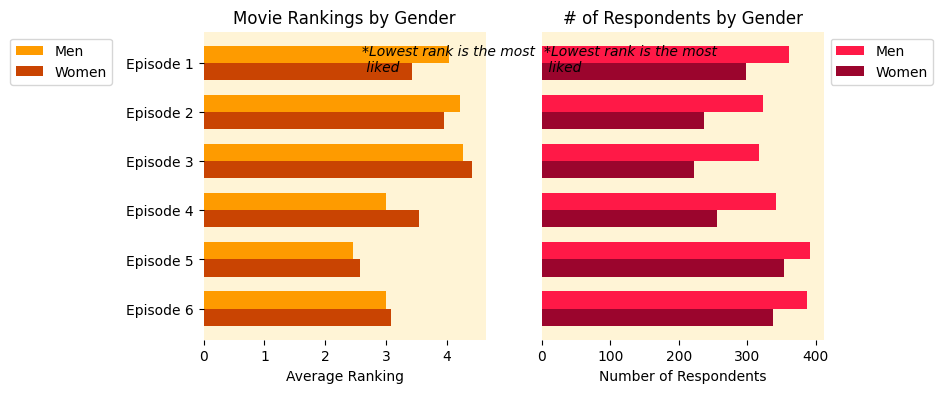

In [61]:
import numpy as np
import matplotlib.pyplot as plt

males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]

male_ranking_avgs=males[males.columns[9:15]].mean()
female_ranking_avgs = females[females.columns[9:15]].mean()

male_tot_seen = males[males.columns[3:9]].sum()
female_tot_seen = females[females.columns[3:9]].sum()


#adding index range and height of chart
ind = np.arange(6)
height = 0.35
offset = ind + height

#creates a figure and a set of axes for the plot, specifying the size of the figure.
fig,ax = plt.subplots(1, 2, figsize=(8,4))
#creates the horizontal bar chart using the axis and values for male
malebar = ax[0].barh(ind, male_ranking_avgs, color='#fe9b00', height=height)
#creates the horizontal bar chart using the axis and values for female with different color
femalebar = ax[0].barh(offset, female_ranking_avgs, color='#c94402', height=height)
#Adding background color
ax[0].set_facecolor('#fff4d6')
#Adding Title of Chart
ax[0].set_title('Movie Rankings by Gender')
#Add text
ax[0].text(2.6,0.35,'*Lowest rank is the most\n liked', fontstyle='italic')
#Named the X Axis
#Adding height and labeling the y axis
ax[0].set_yticks(ind + height / 2)
ax[0].set_yticklabels(('Episode 1', 'Episode 2', 'Episode 3', 'Episode 4', 'Episode 5',
                   'Episode 6'))
#labeling x axis
ax[0].set_xlabel('Average Ranking')
#Display gender differing box
ax[0].legend((malebar[0], femalebar[0]), ('Men', 'Women'),bbox_to_anchor=[-0.3,1])
ax[0].invert_yaxis()

#creates the horizontal bar chart using the axis and values for male
male2bar = ax[1].barh(ind, male_tot_seen, color='#ff1947', height=height)
#creates the horizontal bar chart using the axis and values for female with different color
female2bar = ax[1].barh(offset, female_tot_seen, color='#9b052d', height=height)
#Adding Background color
ax[1].set_facecolor('#fff4d6')
#Adding the Title for second Chart
ax[1].set_title('# of Respondents by Gender')
#Removing y axis Labeling cause already displayed in first chart
ax[1].set_yticks([])
#Adding x axis label
ax[1].set_xlabel('Number of Respondents')
#Add text
ax[1].text(2.6,0.35,'*Lowest rank is the most\n liked', fontstyle='italic')
#Named the X Axis
#displaying box to differenciate specific gender
ax[1].legend((male2bar[0], female2bar[0]), ('Men', 'Women'),bbox_to_anchor=[1,1])
ax[1].invert_yaxis()

#Removing the Chart's borders for both Charts
for a in ax:
    for spine in ['top', 'right', 'bottom', 'left']:
        a.spines[spine].set_visible(False)

#To Display Perfectly
plt.show()

In [62]:
#Average male rank
males = star_wars[star_wars["Gender"] == "Male"]
#Average female rank
females = star_wars[star_wars["Gender"] == "Female"]

#To Display
display(males.head(2))
display(females.head(2))

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,ranking_ep1,...,Yoda,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,True,True,True,True,True,True,True,True,3.0,...,Very favorably,I don't understand this question,True,No,False,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,True,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central


,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,ranking_ep1,...,Yoda,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
111,3291439708,True,True,True,True,False,False,True,True,1.0,...,Somewhat favorably,Greedo,True,No,True,Female,> 60,"$50,000 - $99,999",Bachelor degree,South Atlantic
112,3291439404,True,False,True,False,False,False,False,False,1.0,...,Somewhat favorably,I don't understand this question,False,NaN,False,Female,> 60,"$25,000 - $49,999",Graduate degree,Pacific


In [63]:
#Male Average Ranking Counts
male_ranking_avgs=males[males.columns[9:15]].mean()

#Female Average Ranking Counts
female_ranking_avgs = females[females.columns[9:15]].mean()

#Male Total seen counts
male_tot_seen = males[males.columns[3:9]].sum()

#Female tptal seen counts
female_tot_seen = females[females.columns[3:9]].sum()

#To Display Gender Display
for mean_stats in [male_ranking_avgs, female_ranking_avgs, male_tot_seen, female_tot_seen]:
    display(mean_stats)

#Display Male ranking Average
print(" Male Ranking Averages:")
display(male_ranking_avgs)


,0
ranking_ep1,4.037825
ranking_ep2,4.224586
ranking_ep3,4.274882
ranking_ep4,2.997636
ranking_ep5,2.458629
ranking_ep6,3.002364


,0
ranking_ep1,3.429293
ranking_ep2,3.954660
ranking_ep3,4.418136
ranking_ep4,3.544081
ranking_ep5,2.569270
ranking_ep6,3.078086


,0
seen_1,361
seen_2,323
seen_3,317
seen_4,342
seen_5,392
seen_6,387


,0
seen_1,298
seen_2,237
seen_3,222
seen_4,255
seen_5,353
seen_6,338


 Male Ranking Averages:


,0
ranking_ep1,4.037825
ranking_ep2,4.224586
ranking_ep3,4.274882
ranking_ep4,2.997636
ranking_ep5,2.458629
ranking_ep6,3.002364


In [64]:
#Display Female ranking Average
print(" Female Ranking Averages:")
display(female_ranking_avgs)


 Female Ranking Averages:


,0
ranking_ep1,3.429293
ranking_ep2,3.954660
ranking_ep3,4.418136
ranking_ep4,3.544081
ranking_ep5,2.569270
ranking_ep6,3.078086


In [65]:
#Display Male Total seen counts
print(" Male Total Seen Counts:")
display(male_tot_seen)

 Male Total Seen Counts:


,0
seen_1,361
seen_2,323
seen_3,317
seen_4,342
seen_5,392
seen_6,387


In [66]:
#Display Female Total seen counts
print(" Female Total Seen Counts:")
display(female_tot_seen)

 Female Total Seen Counts:


,0
seen_1,298
seen_2,237
seen_3,222
seen_4,255
seen_5,353
seen_6,338


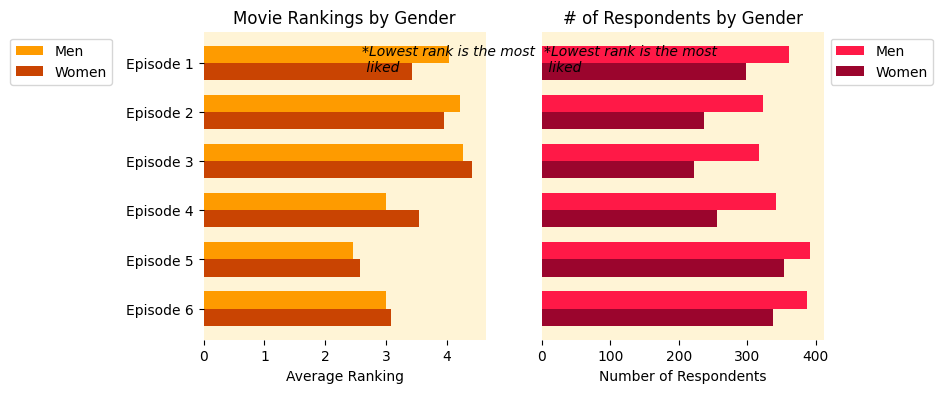

In [68]:
#adding index range and height of chart

ind = np.arange(6)
height = 0.35
offset = ind + height

#creates a figure and a set of axes for the plot, specifying the size of the figure.
fig,ax = plt.subplots(1, 2, figsize=(8,4))
#creates the horizontal bar chart using the axis and values for male
malebar = ax[0].barh(ind, male_ranking_avgs, color='#fe9b00', height=height)
#creates the horizontal bar chart using the axis and values for female with different color
femalebar = ax[0].barh(offset, female_ranking_avgs, color='#c94402', height=height)
#Adding background color
ax[0].set_facecolor('#fff4d6')
#Adding Title of Chart
ax[0].set_title('Movie Rankings by Gender')
#Add text
ax[0].text(2.6,0.35,'*Lowest rank is the most\n liked', fontstyle='italic')
#Named the X Axis
#Adding height and labeling the y axis
ax[0].set_yticks(ind + height / 2)
ax[0].set_yticklabels(('Episode 1', 'Episode 2', 'Episode 3', 'Episode 4', 'Episode 5',
                   'Episode 6'))
#labeling x axis
ax[0].set_xlabel('Average Ranking')
#Display gender differing box
ax[0].legend((malebar[0], femalebar[0]), ('Men', 'Women'),bbox_to_anchor=[-0.3,1])
#Reversing the Chart
ax[0].invert_yaxis()

#creates the horizontal bar chart using the axis and values for male
male2bar = ax[1].barh(ind, male_tot_seen, color='#ff1947', height=height)
#creates the horizontal bar chart using the axis and values for female with different color
female2bar = ax[1].barh(offset, female_tot_seen, color='#9b052d', height=height)
#Adding Background color
ax[1].set_facecolor('#fff4d6')
#Adding the Title for second Chart
ax[1].set_title('# of Respondents by Gender')
#Removing y axis Labeling cause already displayed in first chart
ax[1].set_yticks([])
#Adding x axis label
ax[1].set_xlabel('Number of Respondents')
#Add text
ax[1].text(2.6,0.35,'*Lowest rank is the most\n liked', fontstyle='italic')
#Named the X Axis
#displaying box to differenciate specific gender
ax[1].legend((male2bar[0], female2bar[0]), ('Men', 'Women'),bbox_to_anchor=[1,1])
#Reversing the chart
ax[1].invert_yaxis()

#Removing the Chart's borders for both Charts
for a in ax:
    for spine in ['top', 'right', 'bottom', 'left']:
        a.spines[spine].set_visible(False)

#To Display Perfectly
plt.show()

In [69]:
import pandas as pd

# Create a DataFrame
education_df = pd.DataFrame({
    "actor_id": [101, 102, 103, 104, 105, 106, 107, 108],
    "education": [
        "Los Angeles City College (Drama)",
        "Central School of Speech and Drama (UK)",
        "Ripon College (Philosophy, dropped out)",
        "Harvard University (Psychology)",
        "Juilliard School (Drama Division)",
        "Tring Park School for Performing Arts",
        "Identity School of Acting (London)",
        "Guildhall School of Music and Drama"
    ]
})

# Example usage
selected_actor = education_df[education_df["actor_id"] == 105]
print(selected_actor)

   actor_id                          education
4       105  Juilliard School (Drama Division)


In [70]:
#Check Selected Actors Education
selected_actor = education_df[education_df["actor_id"] == 102]
print(selected_actor)

   actor_id                                education
1       102  Central School of Speech and Drama (UK)


In [71]:
#Check Selected Actors Education
selected_actor = education_df[education_df["actor_id"] == 107]
print(selected_actor)

   actor_id                           education
6       107  Identity School of Acting (London)


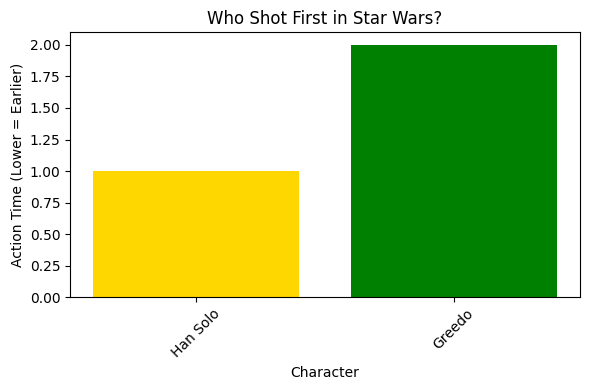

In [72]:
# Sample data mimicking a moment from Star Wars
data = {
    'Character': ['Han Solo', 'Greedo'],
    'Action': ['Shoots', 'Threatens'],
    'Time': [1, 2]  # 1 means first action, 2 means second
}

df = pd.DataFrame(data)

# Sort and plot
df_sorted = df.sort_values('Time')

plt.figure(figsize=(6, 4))
plt.bar(df_sorted['Character'], df_sorted['Time'], color=['gold', 'green'])
plt.title("Who Shot First in Star Wars?")
plt.xlabel("Character")
plt.ylabel("Action Time (Lower = Earlier)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [73]:
import pandas as pd
#Filter for Cantina Scene
#If you want to isolate the famous moment between Han and Greedo:

# Example filtering
shot_first = star_wars["Which character shot first?"].value_counts()

print(shot_first)

Which character shot first?
Han                                 325
I don't understand this question    306
Greedo                              197
Name: count, dtype: int64
